In [1]:
import numpy as np
import numba
import scipy.sparse as ssp
import scipy.stats
import time
import sys
import pdb
%load_ext line_profiler
%load_ext autoreload
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

## nu = 1/3

In [2]:
Nphi = lambda Ne, p, q: q*Ne/p

In [3]:
p = 1; q = 3
print("N_e | N_H       | N_H (sector) | N_H (Haldane) | N_H (Yoshioka)")
for Ne in np.arange(3, 16):
    NH1 = scipy.special.comb(Nphi(Ne, p, q), Ne)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {3:.4e}    | {4:.4e}".format(
#             Ne, NH1, NH1/(3*Ne), NH1/(3*Ne*Ne)))
           Ne, NH1, NH1/(Nphi(Ne, p, q)), NH1/(q*Ne*Ne), NH1/(Nphi(Ne, p, q)/q)**2))

N_e | N_H       | N_H (sector) | N_H (Haldane) | N_H (Yoshioka)
 3  | 8.400e+01 | 9.333e+00    | 3.1111e+00    | 9.3333e+00
 4  | 4.950e+02 | 4.125e+01    | 1.0312e+01    | 3.0938e+01
 5  | 3.003e+03 | 2.002e+02    | 4.0040e+01    | 1.2012e+02
 6  | 1.856e+04 | 1.031e+03    | 1.7189e+02    | 5.1567e+02
 7  | 1.163e+05 | 5.537e+03    | 7.9102e+02    | 2.3731e+03
 8  | 7.355e+05 | 3.064e+04    | 3.8306e+03    | 1.1492e+04
 9  | 4.687e+06 | 1.736e+05    | 1.9287e+04    | 5.7862e+04
10  | 3.005e+07 | 1.002e+06    | 1.0015e+05    | 3.0045e+05
11  | 1.935e+08 | 5.865e+06    | 5.3316e+05    | 1.5995e+06
12  | 1.252e+09 | 3.477e+07    | 2.8974e+06    | 8.6922e+06
13  | 8.122e+09 | 2.083e+08    | 1.6021e+07    | 4.8062e+07
14  | 5.286e+10 | 1.259e+09    | 8.9898e+07    | 2.6970e+08
15  | 3.449e+11 | 7.664e+09    | 5.1091e+08    | 1.5327e+09


## nu = 1/5

In [4]:
print("N_e | N_H       | N_H (sector) | N_H (Haldane)")
for N in np.arange(3, 12):
    NH1 = scipy.special.comb(5*N, N)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {3:.4e}".format(N, NH1, NH1/(3*N), NH1/(3*N*N)))

N_e | N_H       | N_H (sector) | N_H (Haldane)
 3  | 4.550e+02 | 5.056e+01    | 1.6852e+01
 4  | 4.845e+03 | 4.038e+02    | 1.0094e+02
 5  | 5.313e+04 | 3.542e+03    | 7.0840e+02
 6  | 5.938e+05 | 3.299e+04    | 5.4979e+03
 7  | 6.725e+06 | 3.202e+05    | 4.5745e+04
 8  | 7.690e+07 | 3.204e+06    | 4.0055e+05
 9  | 8.862e+08 | 3.282e+07    | 3.6468e+06
10  | 1.027e+10 | 3.424e+08    | 3.4241e+07
11  | 1.197e+11 | 3.626e+09    | 3.2962e+08


In [ ]:
print("N_e | N_H       | N_H (sector) | N_H (Haldane)")
for N in np.arange(4, 18, 2):
    NH1 = scipy.special.comb(5*N//2, N)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {3:.4e}".format(N, NH1, NH1/(3*N), NH1/(3*N*N)))

In [6]:
import mbhamiltonian

ModuleNotFoundError: No module named 'mbhamiltonian'

In [7]:
params = {"Nphi": 9,
          "Ne": 3,
          "usemc": True}

In [8]:
T1 = mbhamiltonian.Torus(params["Nphi"])
MBH1 = mbhamiltonian.MBHamiltonian(T1, params)

In [9]:
P1 = mbhamiltonian.Potential(T1, {'type2': ['coulomb']})
# MBH1.

No 1-body terms


In [10]:
MBH1.make_hamiltonian2(P1)

Where's Waldo?


In [11]:
# Ham = MBH1.H2.todense()

In [12]:
E, V = ssp.linalg.eigsh(MBH1.H2, which='SA')

In [13]:
E[0] - E[3]

0.06652137253922613

In [14]:
MBH1.vechspace()

array([  7,  11,  13,  14,  19,  21,  22,  25,  26,  28,  35,  37,  38,
        41,  42,  44,  49,  50,  52,  56,  67,  69,  70,  73,  74,  76,
        81,  82,  84,  88,  97,  98, 100, 104, 112, 131, 133, 134, 137,
       138, 140, 145, 146, 148, 152, 161, 162, 164, 168, 176, 193, 194,
       196, 200, 208, 224, 259, 261, 262, 265, 266, 268, 273, 274, 276,
       280, 289, 290, 292, 296, 304, 321, 322, 324, 328, 336, 352, 385,
       386, 388, 392, 400, 416, 448])

In [15]:
orbocc = np.array([MBH1.dec2spin(n) for n in MBH1.vechspace()])

In [16]:
conf = np.zeros((84, 3), dtype=int)
for cp, p in enumerate(orbocc):
    n = 0
    for ci, i in enumerate(p):
        if i == 1:
            conf[cp, n] = int(ci)
            n += 1

In [17]:
MBH1.vechspace()[0], conf[0], MBH1.vechspace()[60], conf[60]

(7, array([0, 1, 2]), 266, array([1, 3, 8]))

In [18]:
MBH1.vechspace()[56], conf[56], MBH1.vechspace()[36], conf[36]

(259, array([0, 1, 8]), 133, array([0, 2, 7]))

In [19]:
auxmat = np.real(MBH1.auxmat)#np.max(np.imag(MBH1.auxmat) / np.real(MBH1.auxmat))

In [20]:
np.real(MBH1.H2[0, 60]), 0.5*(auxmat[2, 3] - auxmat[7, 1] - auxmat[2, 8] + auxmat[7, 6])

(0.03515837459284698, -0.03515837459284698)

In [21]:
np.real(MBH1.H2[60, 0])

0.03515837459284702

In [22]:
np.real(MBH1.H2[56, 36]), 0.5*(auxmat[2, 3] - auxmat[7, 1] - auxmat[2, 8] + auxmat[7, 6])

(0.035158374592846986, -0.03515837459284698)

In [23]:
auxmat[2, 3], auxmat[7, 1], auxmat[2, 8], auxmat[7, 6]

(0.00394957624799506,
 0.03910795084084204,
 0.03910795084084205,
 0.003949576247995062)

In [24]:
np.real(MBH1.H2[3, 3])

-0.17111156696059668

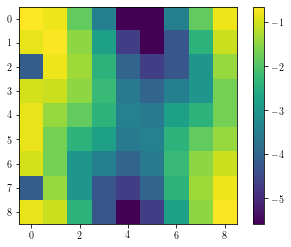

In [25]:
plt.imshow(np.log10(np.abs(auxmat)))
plt.colorbar()

/home/ak20/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


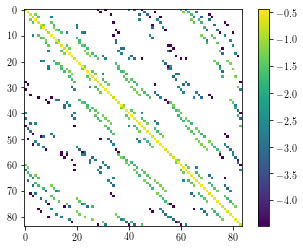

In [26]:
plt.imshow(np.log10(np.abs(MBH1.H2.todense())))
plt.colorbar()

In [27]:
auxmat[2, 7], auxmat[3, 7]

(0.00097288371141864, 0.0009728837114186331)

In [28]:
E, V = np.linalg.eigh(MBH1.H2.todense())

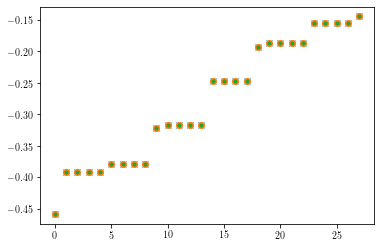

In [29]:
plt.plot(E[::3], 'x')
plt.plot(E[1::3], 'o')
plt.plot(E[2::3], '.')

In [30]:
my_arr = np.r_[-10:-0.9:1, 1:10.1:1]

In [31]:
np.sum(np.exp(-np.pi*my_arr**2/9) * 1/np.abs(my_arr) / np.sqrt(18*np.pi))

0.22459992835352333

In [32]:
auxmat[0, 0]

0.22459992835356937

In [33]:
np.real(MBH1.H2[0,0])

-0.17111156696059668

In [34]:
-auxmat[1, 0]+auxmat[1, 1]-auxmat[2, 0]+auxmat[2, 2]-auxmat[1, 0]+auxmat[1, 1]

0.17111156696059657

In [117]:
%lprun -f get_sector_id get_sector_id(allStates[24, 8], 24)

Timer unit: 1e-06 s

Total time: 8.13333 s
File: <ipython-input-116-cb930b1d773f>
Function: get_sector_id at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def get_sector_id(states, Nphi):
     3         1          3.0      3.0      0.0      Nh = len(states)
     4         1         22.0     22.0      0.0      NphiArr = np.arange(Nphi)
     5         1        777.0    777.0      0.0      sectorArr = np.zeros(Nh)
     6    735472     350198.0      0.5      4.3      for i in range(Nh):
     7    735471    7782335.0     10.6     95.7          sectorArr[i] = np.sum(NphiArr[states[i]]) % Nphi
     8         1          0.0      0.0      0.0      return sectorArr

In [9]:
fol='/tigress/ak20/QH/hilbert/'
Nphi = 30
Ne = 10
sect_min = ((Ne-1)*Ne)//2
sect_max = ((2*Nphi-Ne-1)*Ne)//2
d = {}

for sector in range(sect_min, sect_max+1):
    if sector%Nphi == 0:
        try:
            fil = lambda Nphi, Ne, sector: 'Nphi{0:d}_Ne{1:d}_sector{2:d}'.format(Nphi, Ne, sector)
            f = np.load(fol+fil(Nphi, Ne, sector)+'.npy')
            d[sector] = f
        except FileNotFoundError:
            pass

In [10]:
d.keys()

dict_keys([60, 90, 120, 150, 180, 210, 240])

In [11]:
poop = 0
for k in d.keys():
    print(k, len(d[k]))
    poop += len(d[k])

60 164
90 27822
120 292714
150 506357
180 166750
210 7588
240 7


In [13]:
state222 = np.array([ 2,  3, 10, 12, 13, 16, 19, 23, 24, 28], dtype='int8')

In [14]:
state222

array([ 2,  3, 10, 12, 13, 16, 19, 23, 24, 28], dtype=int8)

## NUMBA EXPERIMENTS

/home/ak20/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: underflow encountered in exp


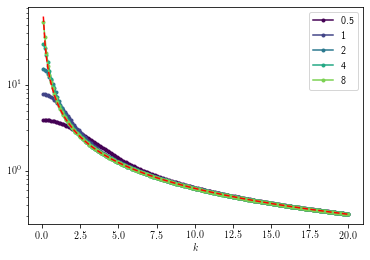

In [127]:
# Lx = 75
np.seterr(all='warn')
k_arr = np.r_[0.1:20.001:0.1]
f, ax = plt.subplots()
n = 2
x_arr = [0.5, 1, 2, 4, 8]
for cx, x in enumerate(x_arr):
    ax.plot(k_arr, VFourier(k_arr, n=1, x=x), color=plt.cm.viridis((1.*cx/len(x_arr))),
            label=str(x), marker='.')
ax.plot(k_arr, 2*np.pi / k_arr, '--r')
ax.set_xlabel(r'$k$')
ax.set_yscale('log')
ax.legend(loc='best')

In [55]:
spec = [
    ('x', numba.float64[:]), 
    ('N', numba.int64)# an array field
]

@numba.jitclass(spec)
class myClassJit:
    
    def __init__(self):
        np.random.seed(455)
        self.N = 100_000
        self.x = np.random.rand(self.N)
        
    def mv(self, v):
        w = np.zeros(self.N)
        for i in range(self.N):
            w[i] += self.x[i] * v[(i+2)%self.N]
            w[(i+2)%self.N] += self.x[i] * v[i]

        return w
    
class myClass:
    
    def __init__(self):
        np.random.seed(455)
        self.N = 100_000
        self.x = np.random.rand(self.N)
        
    def mv(self, v):
        w = np.zeros(self.N)
        for i in range(self.N):
            w[i] += self.x[i] * v[(i+2)%self.N]
            w[(i+2)%self.N] += self.x[i] * v[i]

        return w

In [56]:
myObjJit = myClassJit()
myObj = myClass()
AJit = ssp.linalg.LinearOperator((100_000, 100_000), matvec=myObjJit.mv)
A = ssp.linalg.LinearOperator((100_000, 100_000), matvec=myObj.mv)

In [58]:
t1 =  time.time()
VJit = AJit.matvec(np.ones(100_000))
t2 = time.time()
V = A.matvec(np.ones(100_000))
t3 = time.time()
print(t3-t2, t2-t1)

0.16527485847473145 0.002401590347290039


In [ ]:
scipy.sparse.linalg.eigsh(A, k=6, M=None, sigma=None, which='SA')

### NEW

In [5]:
import landau
import utils
import hilbert

In [6]:
%autoreload

In [7]:
Nphi = 9
Ne = 3
torus1 = landau.Torus(Nphi)

In [8]:
vParams = {'n': 1, 'x': np.inf} # Coulomb
hamParams= {'alpha': 1.0, 'n': 0, 'Nphi': Nphi} # mass anisotropy, Landau level index

In [9]:
pot1 = landau.Potential()
pot1.setV2(torus1, vParams, hamParams)

In [10]:
T4 = np.real(utils.Utils.make4tensorsym(torus1, pot1))
-T4[7, 3] + T4[7, 4] + T4[2, 5] - T4[2, 6]

-6.661226048026113e-05

In [11]:
sector = 0
hilb0, hilbLen0 = utils.Utils.getHilb(Nphi, Ne, sector)
sector = 1
hilb1, hilbLen1 = utils.Utils.getHilb(Nphi, Ne, sector)
sector = 2
hilb2, hilbLen2 = utils.Utils.getHilb(Nphi, Ne, sector)

In [12]:
hilb0, hilbLen0

(array([[2, 3, 4],
        [1, 3, 5],
        [0, 4, 5],
        [1, 2, 6],
        [0, 3, 6],
        [0, 2, 7],
        [0, 1, 8],
        [5, 6, 7],
        [4, 6, 8],
        [3, 7, 8]], dtype=int8), array([0, 7, 3, 0]))

In [13]:
sector = 0
hilbert0 = hilbert.Hilbert(Nphi, Ne, sector, hilb0, hilbLen0, T4)
M0 = ssp.linalg.LinearOperator((10, 10), matvec=hilbert0.getMatVec)

sector = 1
hilbert1 = hilbert.Hilbert(Nphi, Ne, sector, hilb1, hilbLen1, T4)
M1 = ssp.linalg.LinearOperator((9, 9), matvec=hilbert1.getMatVec)

sector = 2
hilbert2 = hilbert.Hilbert(Nphi, Ne, sector, hilb2, hilbLen2, T4)
M2 = ssp.linalg.LinearOperator((9, 9), matvec=hilbert2.getMatVec)

In [15]:
E0, V0 = scipy.sparse.linalg.eigsh(M0, k=9, which='SA')
E1, V1 = scipy.sparse.linalg.eigsh(M1, k=8, which='SA')
E2, V2 = scipy.sparse.linalg.eigsh(M2, k=8, which='SA')

In [16]:
E0, E1, E2

(array([-0.10931023, -0.04931011, -0.04931011, -0.0486845 ,  0.00241429,
         0.00241429,  0.01623129,  0.04689582,  0.04689582]),
 array([-0.07873834, -0.07873834, -0.0677238 , -0.03580823, -0.03580823,
         0.00413296,  0.07703436,  0.07703436]),
 array([-0.07873834, -0.07873834, -0.0677238 , -0.03580823, -0.03580823,
         0.00413296,  0.07703436,  0.07703436]))